In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
credit_df = pd.read_csv('marketing_data.csv')

In [3]:
credit_df.shape

(8950, 18)

In [4]:
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

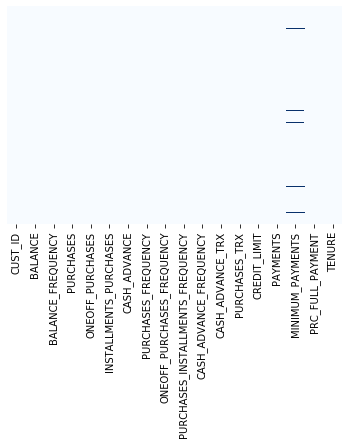

In [8]:
sns.heatmap(credit_df.isnull(), yticklabels = False, cbar=False, cmap = 'Blues')

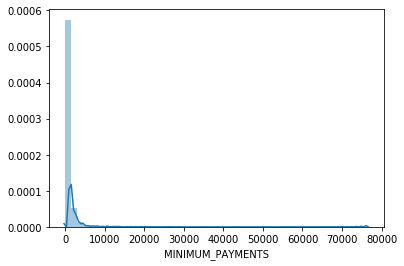

In [9]:
sns.distplot(credit_df['MINIMUM_PAYMENTS'])

In [10]:
print(credit_df['MINIMUM_PAYMENTS'].mean(), credit_df['MINIMUM_PAYMENTS'].median(),
      credit_df['MINIMUM_PAYMENTS'].min(), credit_df['MINIMUM_PAYMENTS'].max())

864.2065423050814 312.343947 0.019163 76406.20752000001


In [11]:
credit_df[credit_df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [12]:
credit_card_customers = credit_df['CUST_ID']

In [13]:
credit_df.drop('CUST_ID', axis = 1, inplace = True)

In [14]:
credit_df.shape

(8950, 17)

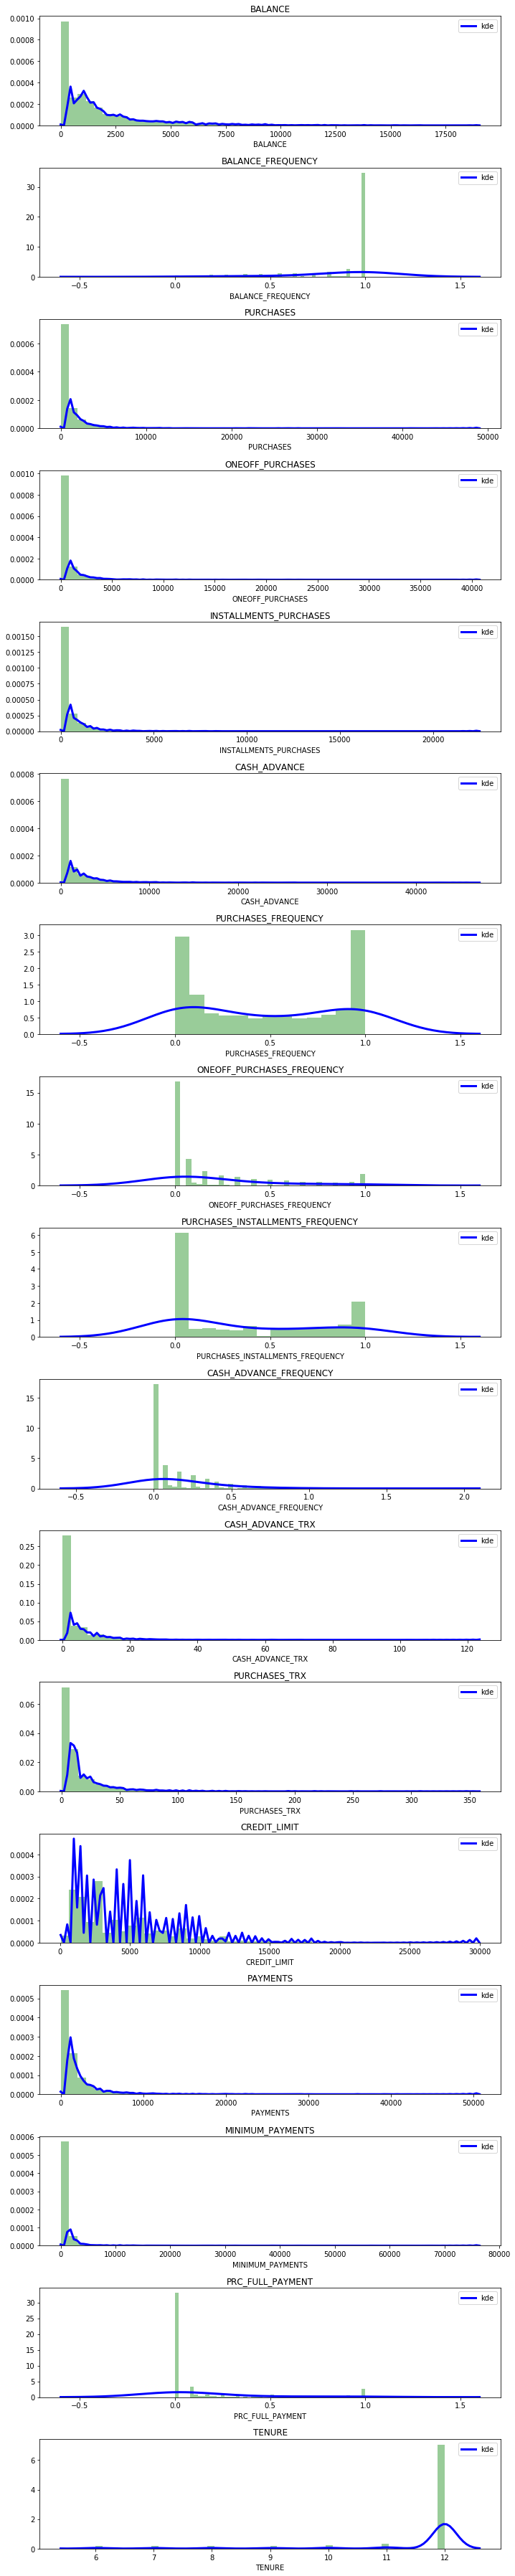

In [15]:
plt.figure(figsize = (10,50))
for i in range(len(credit_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(credit_df[credit_df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'kde', 'bw':.2},
                hist_kws={'color':'g'})
    plt.title(credit_df.columns[i])

plt.tight_layout()    

In [16]:
correlations = credit_df.corr()

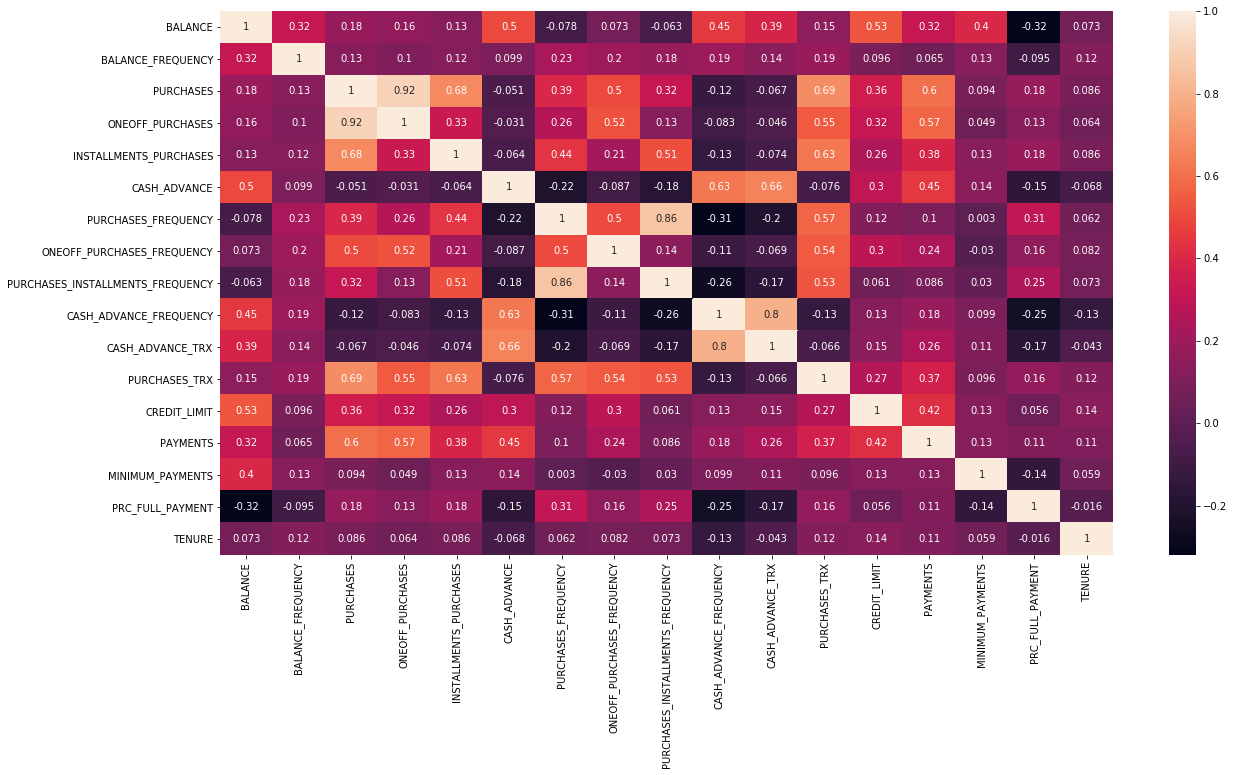

In [17]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, annot = True)

In [18]:
imputer = SimpleImputer(strategy = 'mean')

In [19]:
credit_df['MINIMUM_PAYMENTS'] = imputer.fit_transform(np.array(credit_df['MINIMUM_PAYMENTS']).reshape(-1, 1))

In [20]:
credit_df['MINIMUM_PAYMENTS'].shape

(8950,)

In [21]:
credit_df['MINIMUM_PAYMENTS'].isnull().sum()

0

In [22]:
credit_df['CREDIT_LIMIT'].min()

50.0

In [23]:
credit_df.loc[credit_df['CREDIT_LIMIT'].isnull()==True, 'CREDIT_LIMIT'] = credit_df['CREDIT_LIMIT'].min()

In [24]:
credit_df['CREDIT_LIMIT'].isnull().sum()

0

In [25]:
credit_df.shape

(8950, 17)

In [26]:
scaler = StandardScaler()

In [27]:
credit_df_scaled = pd.DataFrame(data = scaler.fit_transform(credit_df), columns = credit_df.columns)

In [28]:
credit_df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960217,-0.528979,-0.310968,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688718,0.818642,0.089310,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826129,-0.383805,-0.101663,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826129,-0.598688,0.000000,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905252,-0.364368,-0.265791,-0.525551,0.36068


In [29]:
scores_ = []
range_values = range(1, 20)

In [30]:
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(credit_df_scaled)
    scores_.append(kmeans.inertia_)

In [31]:
scores_

[152150.0,
 127784.50522536333,
 111986.25078106018,
 99073.47769992944,
 91503.04769158483,
 84851.02716596835,
 79527.80141743315,
 74493.74107986348,
 71070.69758374286,
 66454.63475232842,
 63632.43649242135,
 61400.73394928774,
 60051.325385723445,
 57511.04350160909,
 56216.91577610893,
 54270.60655055561,
 53065.760117722515,
 51747.32818677016,
 50755.79488076772]

Text(0.5, 1.0, 'Elbow for optimal clusters')

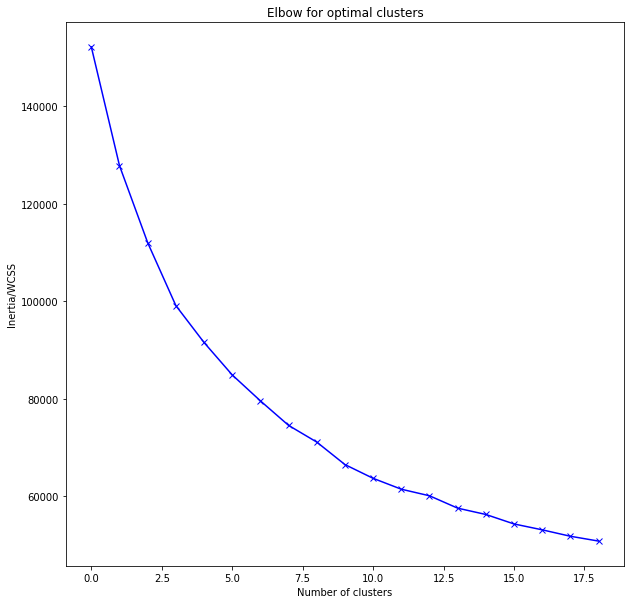

In [32]:
plt.figure(figsize = (10, 10))
plt.plot(scores_, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia/WCSS')
plt.title('Elbow for optimal clusters')

In [54]:
kmeans = KMeans(n_clusters=7)

In [55]:
kmeans.fit(credit_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
labels = kmeans.labels_

In [57]:
labels.shape

(8950,)

In [58]:
labels[:10]

array([5, 1, 2, 5, 5, 0, 2, 0, 5, 3])

In [59]:
labels.min()

0

In [60]:
labels.max()

6

In [61]:
cluster_centers = kmeans.cluster_centers_

In [62]:
cluster_centers.shape

(7, 17)

In [63]:
cluster_centers

array([[-3.67555219e-01,  3.30562011e-01, -3.98402407e-02,
        -2.34949775e-01,  3.37266429e-01, -3.68098626e-01,
         9.80609294e-01, -3.57342939e-01,  1.17319957e+00,
        -4.77686758e-01, -3.62423869e-01,  1.73897496e-01,
        -2.78076470e-01, -2.21809553e-01, -1.57346411e-02,
         3.07237451e-01,  2.52156008e-01],
       [ 1.66647250e+00,  3.92099469e-01, -2.05327040e-01,
        -1.49912529e-01, -2.10161846e-01,  1.99075320e+00,
        -4.56788637e-01, -1.90269392e-01, -4.04043909e-01,
         1.90854705e+00,  1.92210357e+00, -2.41414439e-01,
         1.00763964e+00,  8.34821398e-01,  5.52972639e-01,
        -3.91161155e-01,  6.98071365e-02],
       [ 1.26800648e-01,  4.29730422e-01,  9.39029176e-01,
         8.95887814e-01,  5.74411325e-01, -3.09125318e-01,
         1.09276983e+00,  1.87251301e+00,  5.34806287e-01,
        -4.10394208e-01, -3.20750990e-01,  1.19684770e+00,
         7.01749919e-01,  3.85048471e-01, -5.74619045e-02,
         4.56445606e-01,  3.0

In [64]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns = credit_df.columns)

In [65]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.367555,0.330562,-0.039840,-0.234950,0.337266,-0.368099,0.980609,-0.357343,1.173200,-0.477687,-0.362424,0.173897,-0.278076,-0.221810,-0.015735,0.307237,0.252156
1,1.666473,0.392099,-0.205327,-0.149913,-0.210162,1.990753,-0.456789,-0.190269,-0.404044,1.908547,1.922104,-0.241414,1.007640,0.834821,0.552973,-0.391161,0.069807
2,0.126801,0.429730,0.939029,0.895888,0.574411,-0.309125,1.092770,1.872513,0.534806,-0.410394,-0.320751,1.196848,0.701750,0.385048,-0.057462,0.456446,0.307642
3,-0.701894,-2.135494,-0.307095,-0.230581,-0.302387,-0.322957,-0.547410,-0.428870,-0.441051,-0.522120,-0.376732,-0.416657,-0.171970,-0.201648,-0.257506,0.295702,0.201907
4,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.558657,-0.390701,-0.209383,0.012899,-3.193765
5,0.007572,0.402578,-0.343831,-0.225095,-0.399336,-0.104339,-0.810055,-0.336035,-0.752333,0.084585,-0.041876,-0.464562,-0.301086,-0.248932,-0.015896,-0.452870,0.271810
6,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198324,4.783704,1.080945,0.824001,0.334613


In [66]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [67]:
cluster_centers = pd.DataFrame(cluster_centers, columns = credit_df.columns)

In [68]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,799.439665,0.955578,918.085545,202.468866,716.053491,206.951098,0.883916,0.095855,0.830697,0.039554,0.775550,19.032274,3482.112568,1091.026929,827.537625,0.243576,11.854768
1,5033.096672,0.970155,564.520447,343.613277,221.020895,5153.573564,0.307019,0.145697,0.203860,0.517064,16.365772,8.709172,8160.463697,4149.870001,2152.885952,0.039307,11.610738
2,1828.399674,0.979070,3009.455142,2079.427650,930.500678,330.620880,0.928932,0.761065,0.576983,0.053020,1.059937,44.458991,7047.418985,2847.821449,730.293998,0.287217,11.929022
3,103.540821,0.371392,347.092201,209.719739,137.622715,301.615215,0.270648,0.074517,0.189152,0.030663,0.677909,4.353288,3868.203579,1149.392761,264.100759,0.240202,11.787521
4,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2461.160572,602.104087,376.247870,0.157487,7.243243
5,1580.235683,0.972638,268.605454,218.826105,49.953480,760.066553,0.165236,0.102212,0.065441,0.152070,2.963054,3.162562,3398.387286,1012.510210,827.161759,0.021258,11.881070
6,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116


In [69]:
# 3-Transactors 1, 1--Revolvers,  6--VIP/Prime, 4-new customers, 5--b/w (revolvers 2), 2--Transactors3, 0-Transactors2

In [70]:
y_kmeans = kmeans.fit_predict(credit_df_scaled)

In [71]:
y_kmeans

array([1, 4, 3, ..., 6, 1, 1])

In [72]:
credit_df_cluster = pd.concat([credit_df, pd.DataFrame({'Cluster':labels})], axis = 1)

In [73]:
credit_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


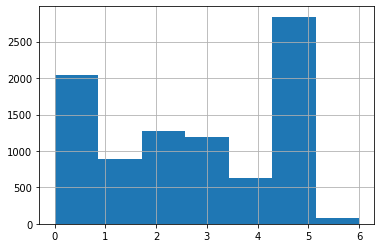

In [75]:
credit_df_cluster['Cluster'].hist(bins = 7)

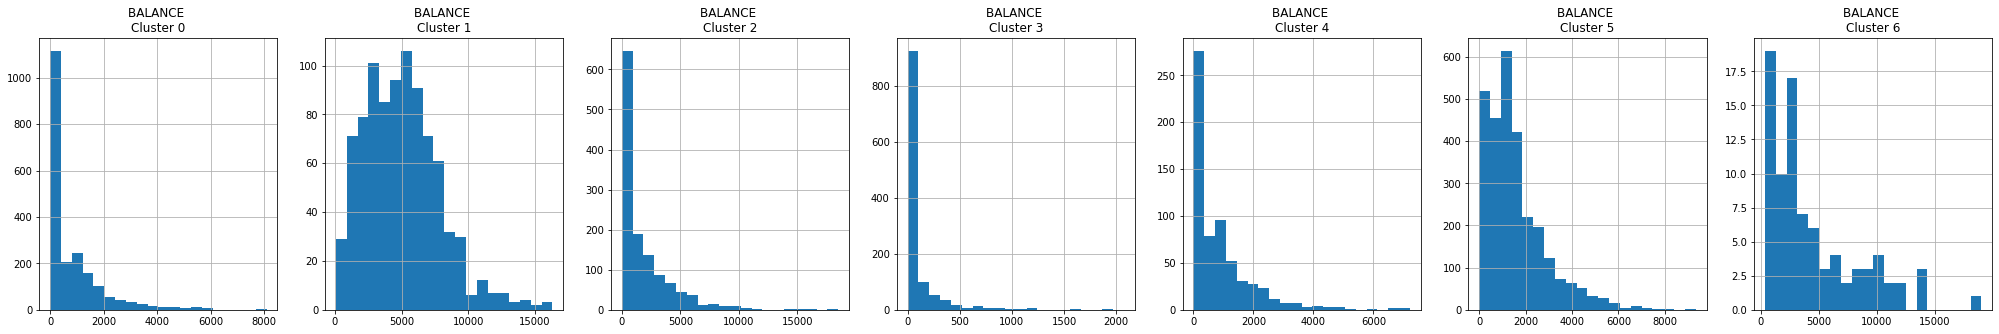

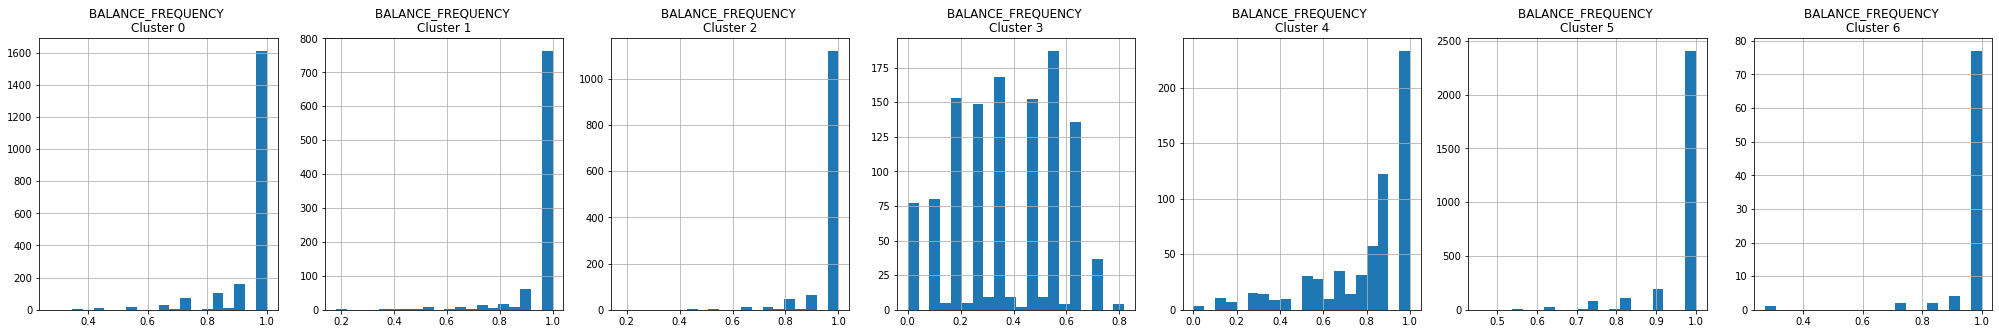

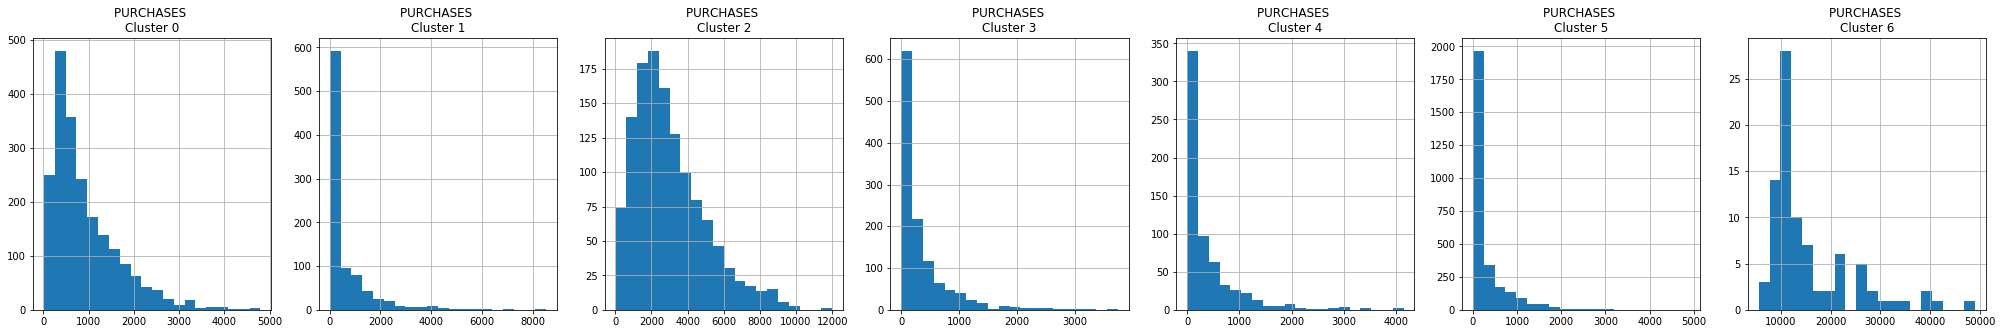

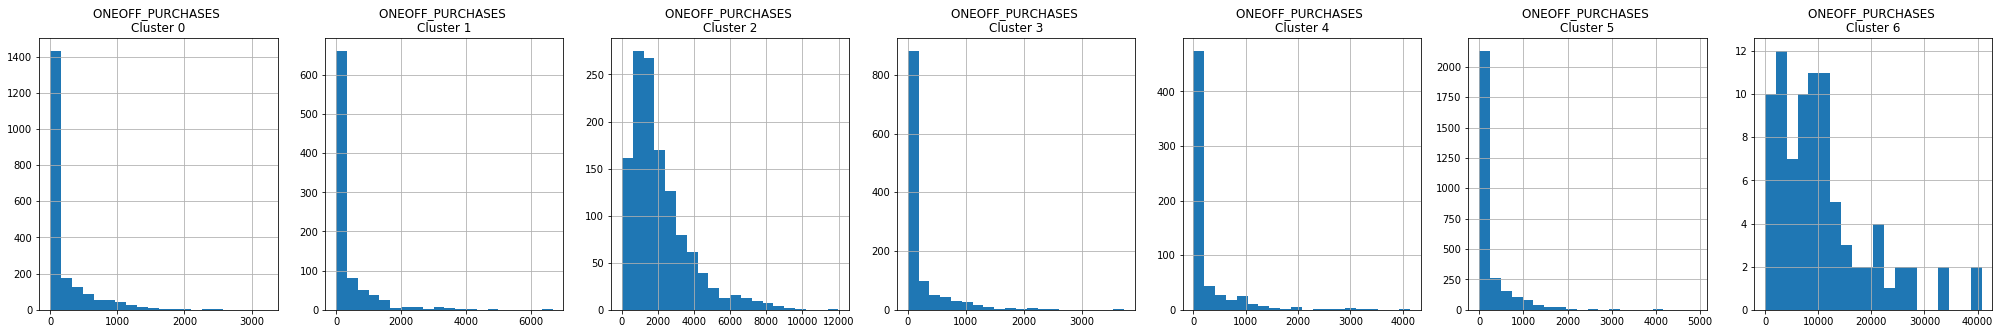

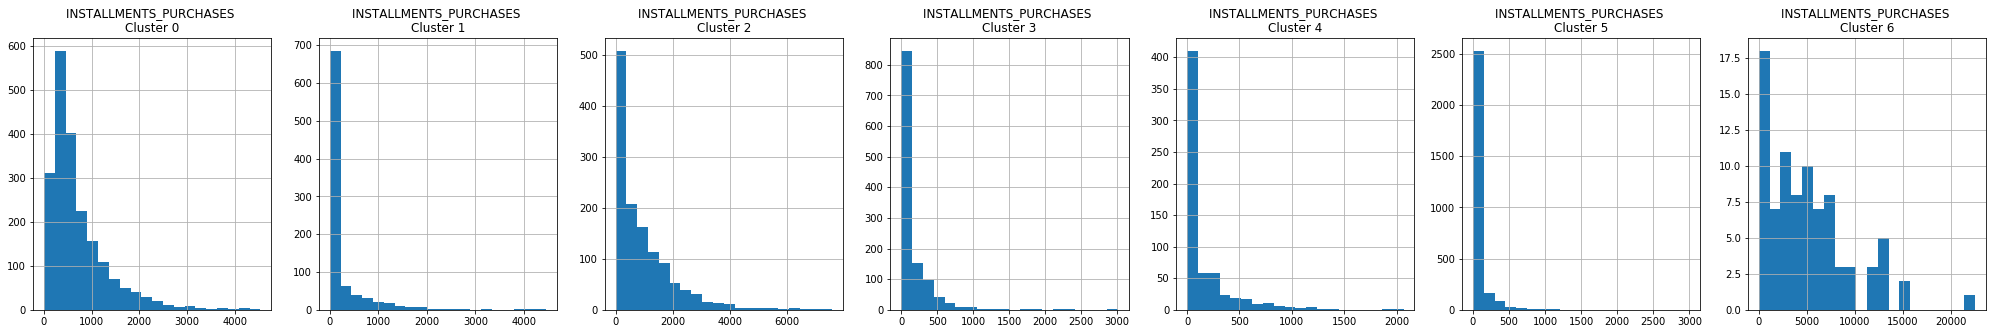

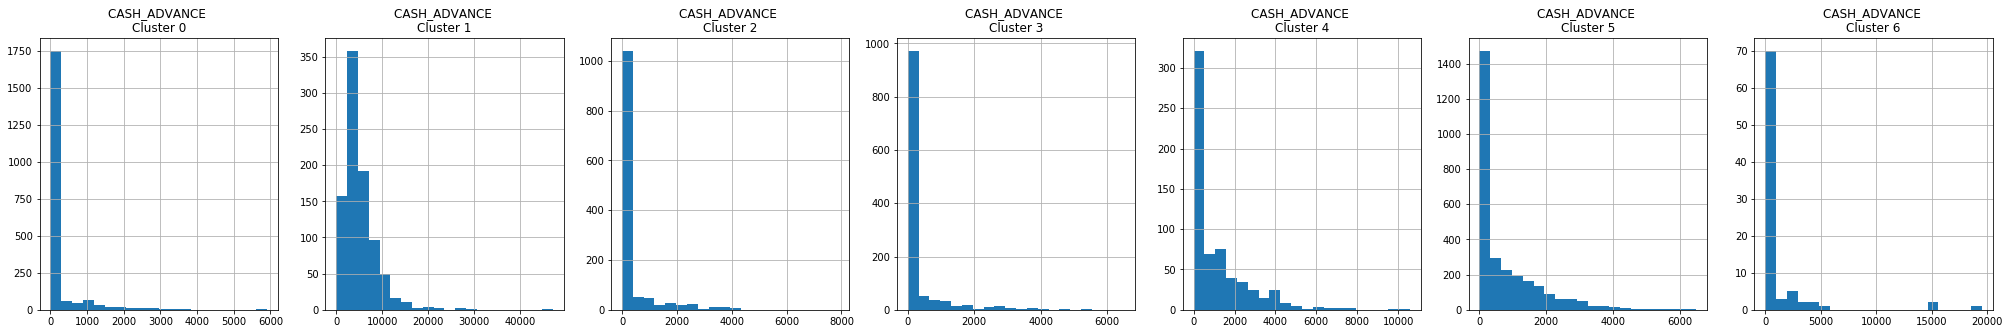

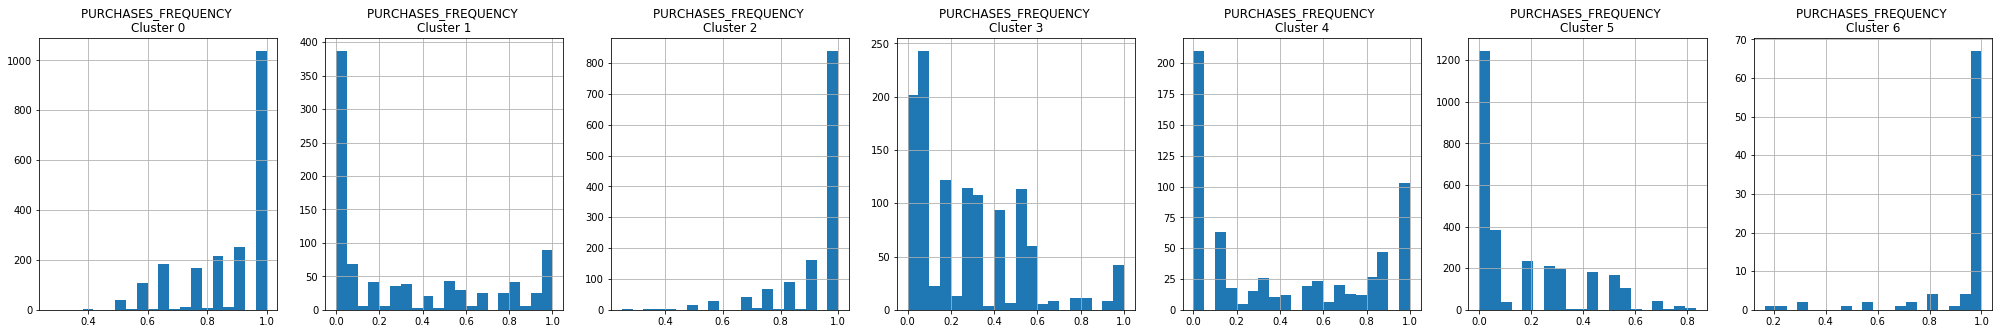

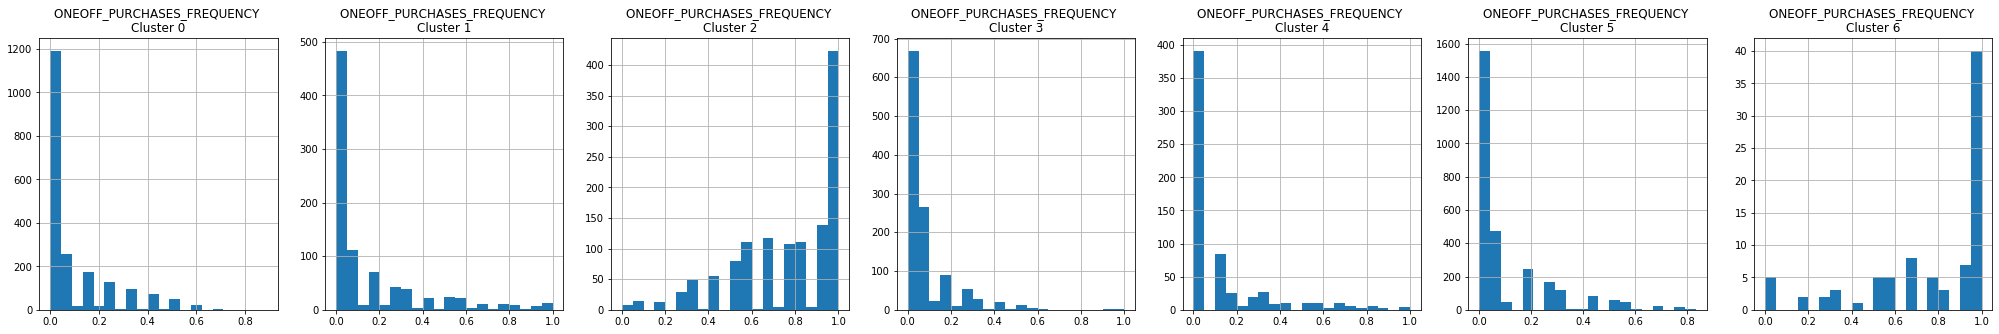

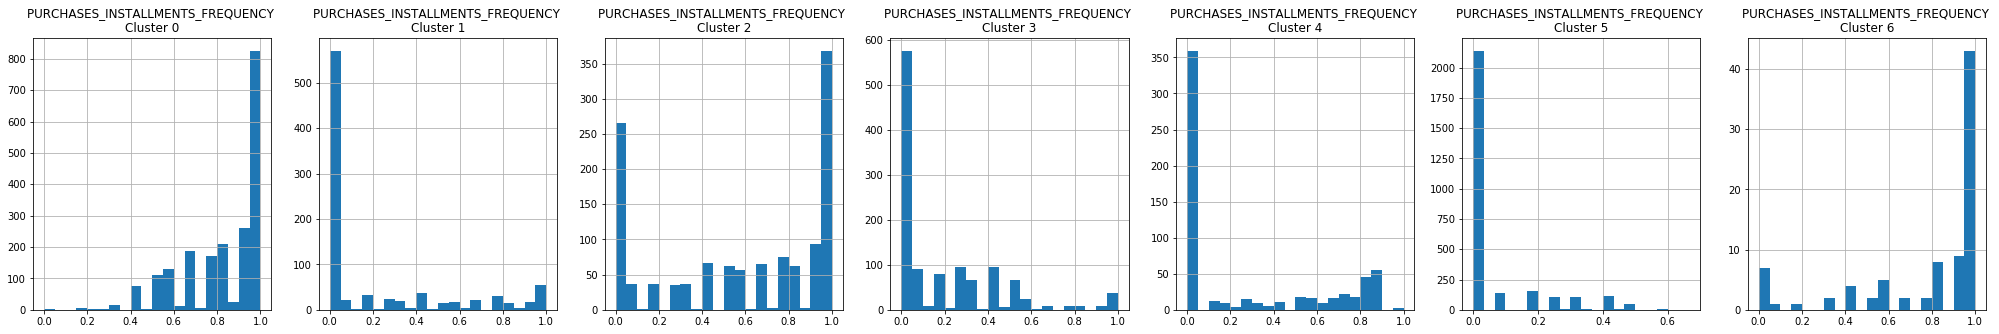

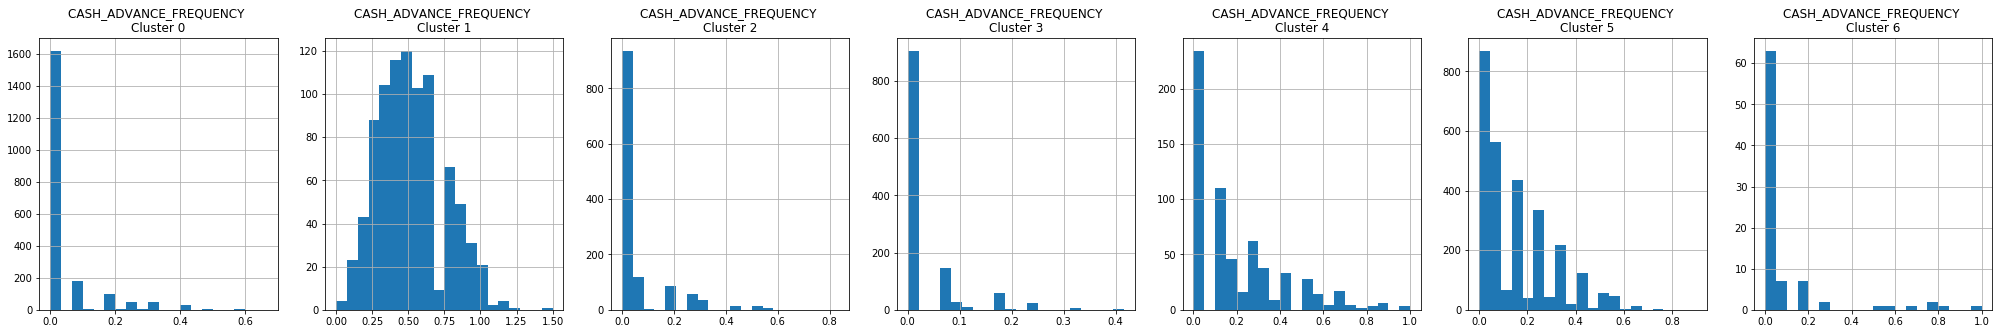

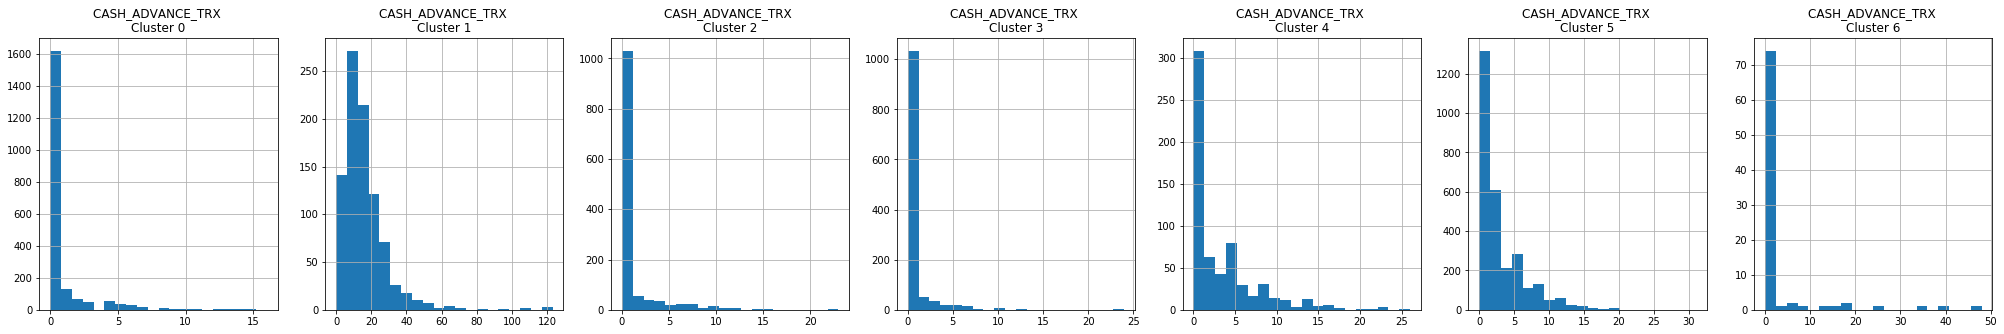

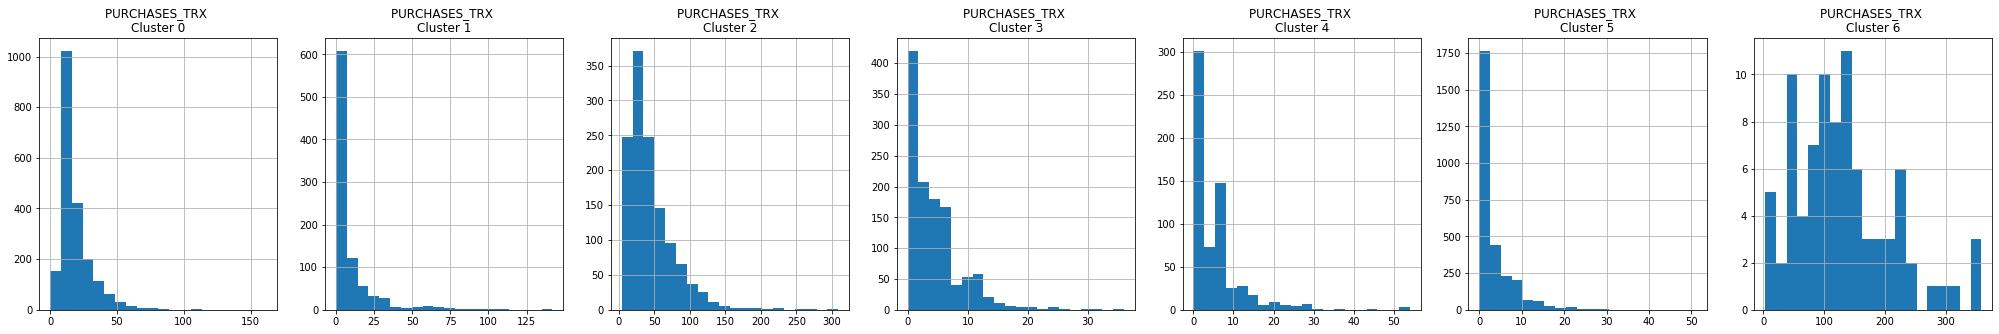

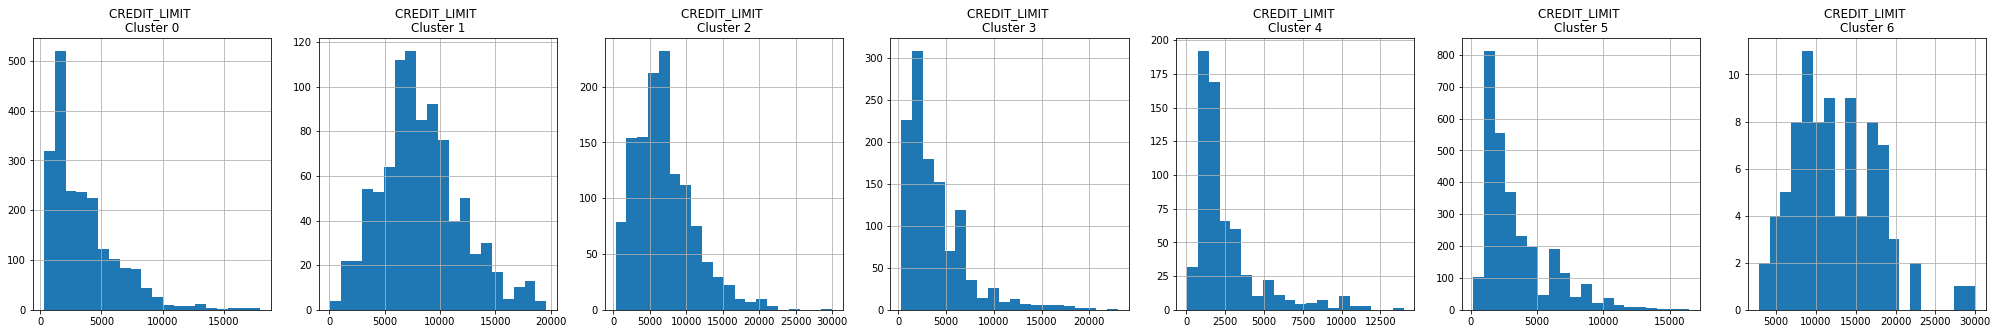

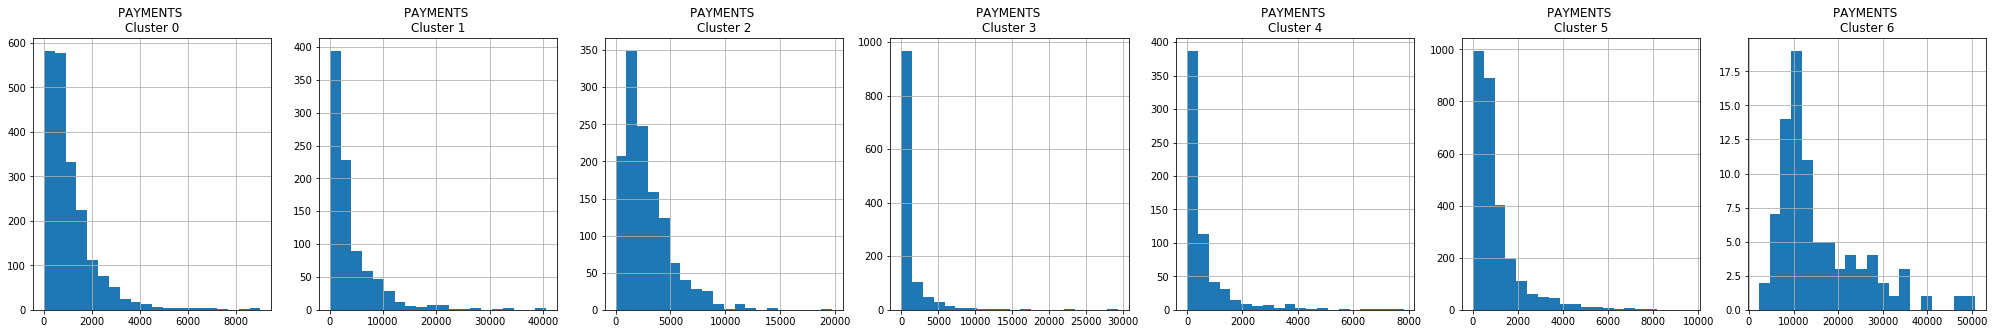

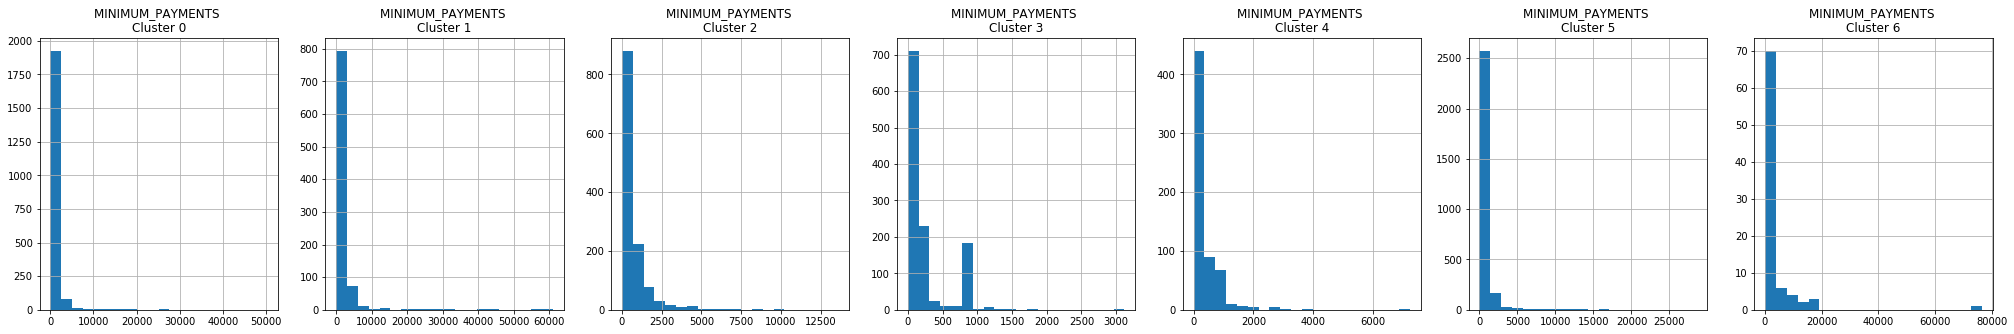

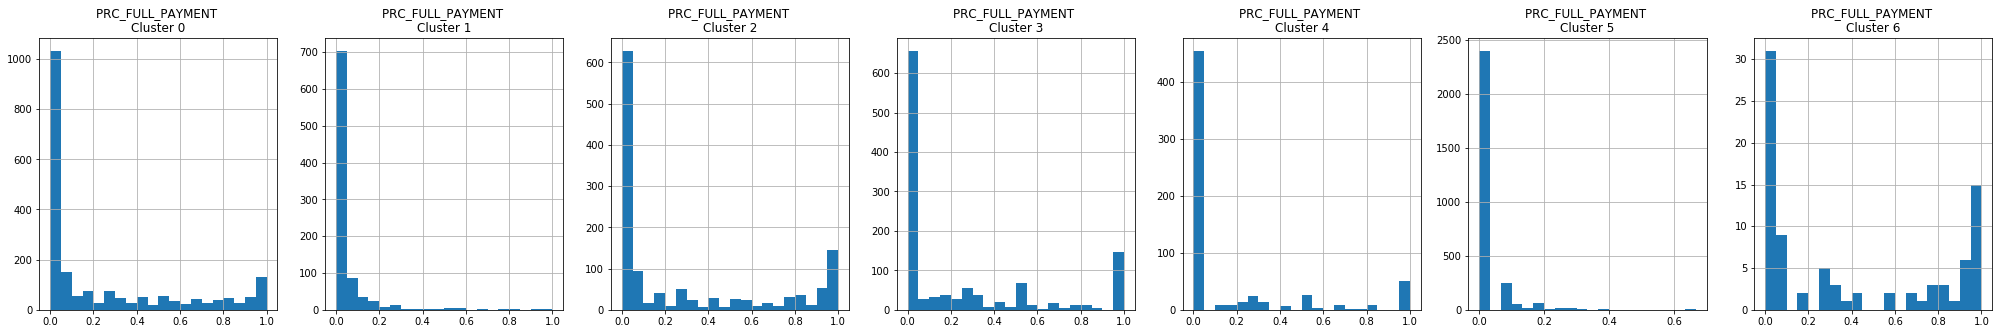

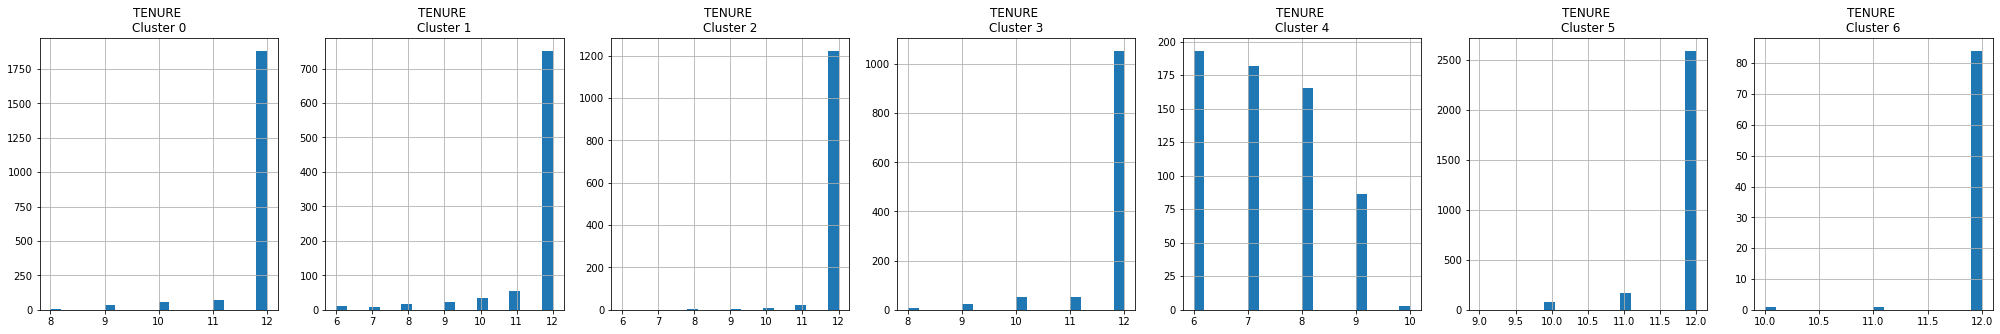

In [78]:
for i in credit_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(7):
        plt.subplot(1, 7, j+1)
        cluster = credit_df_cluster[credit_df_cluster['Cluster']==j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i,j))
plt.show()        

In [79]:
pca = PCA(n_components = 2)

In [80]:
principal_comp = pca.fit_transform(credit_df_scaled)

In [81]:
principal_comp.shape

(8950, 2)

In [82]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])

In [83]:
pca_df.head()

,pca1,pca2
0,-1.682258,-1.076282
1,-1.138078,2.506600
2,0.969751,-0.383542
3,-0.873557,0.043218
4,-1.599436,-0.688396


In [84]:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis = 1)

In [85]:
pca_df.head()

,pca1,pca2,Cluster
0,-1.682258,-1.076282,5
1,-1.138078,2.506600,1
2,0.969751,-0.383542,2
3,-0.873557,0.043218,5
4,-1.599436,-0.688396,5


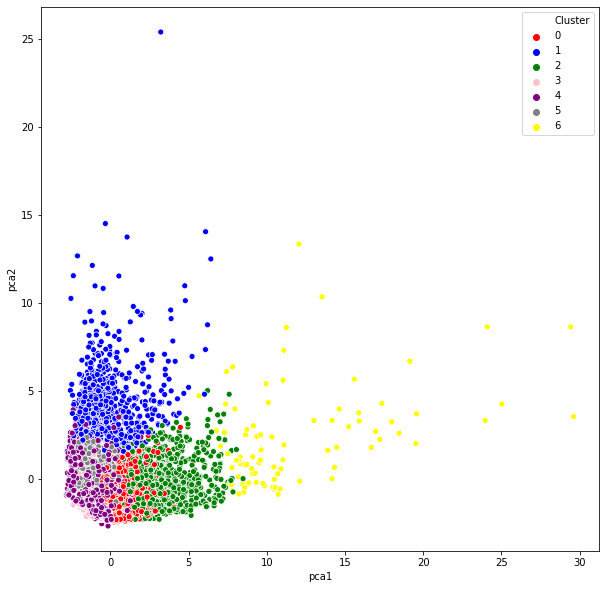

In [92]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Cluster', data = pca_df, palette = ['red', 'blue', 'green', 'pink', 
                                                                                       'purple', 'grey', 'yellow'])
plt.show()